In [48]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
%matplotlib inline

In [49]:
# read .csv file
uber = pd.read_csv('Uber Request Data.csv')
uber

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


In [3]:
# split dataset into right number of columns
uber = pd.read_csv("Uber Request Data.csv", delimiter="\t")
uber

,"Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp"
0,"619,Airport,1,Trip Completed,11/7/2016 11:51,1..."
1,"867,Airport,1,Trip Completed,11/7/2016 17:57,1..."
2,"1807,City,1,Trip Completed,12/7/2016 9:17,12/7..."
3,"2532,Airport,1,Trip Completed,12/7/2016 21:08,..."
4,"3112,City,1,Trip Completed,13-07-2016 08:33:16..."
...,...
6740,"6745,City,NA,No Cars Available,15-07-2016 23:4..."
6741,"6752,Airport,NA,No Cars Available,15-07-2016 2..."
6742,"6751,City,NA,No Cars Available,15-07-2016 23:5..."
6743,"6754,City,NA,No Cars Available,15-07-2016 23:5..."


In [50]:
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [51]:
# check for missing data
uber.isnull().sum() 

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [52]:
# drop duplicate rows
uber.drop_duplicates()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


In [53]:
# fill missing values in 'Driver id' with 'No Driver'
uber['Driver id'] = uber['Driver id'].fillna("No Driver")
uber

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,No Driver,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,No Driver,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,No Driver,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,No Driver,No Cars Available,15-07-2016 23:54:39,NaN


In [54]:
# add 'Trip Completed' column to show bool value of whether the trip was completed or not
uber['Trip Completed'] = uber['Drop timestamp'].notna()
uber

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Trip Completed
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00,True
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47,True
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58,True
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03,True
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47,True
...,...,...,...,...,...,...,...
6740,6745,City,No Driver,No Cars Available,15-07-2016 23:49:03,NaN,False
6741,6752,Airport,No Driver,No Cars Available,15-07-2016 23:50:05,NaN,False
6742,6751,City,No Driver,No Cars Available,15-07-2016 23:52:06,NaN,False
6743,6754,City,No Driver,No Cars Available,15-07-2016 23:54:39,NaN,False


In [21]:
# unify the Request and Drop timestamp format
uber['Request timestamp'] = pd.to_datetime(uber['Request timestamp'], dayfirst=True, format = 'mixed')
uber['Drop timestamp'] = pd.to_datetime(uber['Drop timestamp'], dayfirst=True, format = 'mixed')
uber

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Trip Completed,Request_hour,Trip duration,Request_day_of_week,Request_day,Request_day_encoded,Request_month,Drop_hour,Drop_day_of_week
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,True,11,69.00,Monday,11,0,7,13.0,Monday
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,True,17,50.00,Monday,11,0,7,18.0,Monday
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,True,9,41.00,Tuesday,12,1,7,9.0,Tuesday
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,True,21,55.00,Tuesday,12,1,7,22.0,Tuesday
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,True,8,52.52,Wednesday,13,2,7,9.0,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,No Driver,No Cars Available,2016-07-15 23:49:03,NaT,False,23,0.00,Friday,15,4,7,NaN,NaN
6741,6752,Airport,No Driver,No Cars Available,2016-07-15 23:50:05,NaT,False,23,0.00,Friday,15,4,7,NaN,NaN
6742,6751,City,No Driver,No Cars Available,2016-07-15 23:52:06,NaT,False,23,0.00,Friday,15,4,7,NaN,NaN
6743,6754,City,No Driver,No Cars Available,2016-07-15 23:54:39,NaT,False,23,0.00,Friday,15,4,7,NaN,NaN


In [55]:
# extra columns to show timestamp data of each request and dropoff

uber['Request_hour'] = uber['Request timestamp'].dt.hour

uber['Trip duration'] = (uber['Drop timestamp'] - uber['Request timestamp']).dt.total_seconds() / 60

uber['Request_day_of_week'] = uber['Request timestamp'].dt.day_name()

uber['Request_day'] = uber['Request timestamp'].dt.day

uber['Request_day_encoded'] = uber['Request timestamp'].dt.dayofweek  # Monday=0, Tuesday=1, ...., Sunday=6

uber['Request_month'] = uber['Request timestamp'].dt.month

uber['Drop_hour'] = uber['Drop timestamp'].dt.hour

uber['Drop_day_of_week'] = uber['Drop timestamp'].dt.day_name()

uber

AttributeError: Can only use .dt accessor with datetimelike values

In [23]:
# fill missing values of 'Trip duration' with 0 as no trip was completed and round to 2 decimal points
uber['Trip duration'] = uber['Trip duration'].fillna(0)
uber['Trip duration'] = uber['Trip duration'].round(2)
uber

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Trip Completed,Request_hour,Trip duration,Request_day_of_week,Request_day,Request_day_encoded,Request_month,Drop_hour,Drop_day_of_week
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,True,11,69.00,Monday,11,0,7,13.0,Monday
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,True,17,50.00,Monday,11,0,7,18.0,Monday
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,True,9,41.00,Tuesday,12,1,7,9.0,Tuesday
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,True,21,55.00,Tuesday,12,1,7,22.0,Tuesday
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,True,8,52.52,Wednesday,13,2,7,9.0,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,No Driver,No Cars Available,2016-07-15 23:49:03,NaT,False,23,0.00,Friday,15,4,7,NaN,NaN
6741,6752,Airport,No Driver,No Cars Available,2016-07-15 23:50:05,NaT,False,23,0.00,Friday,15,4,7,NaN,NaN
6742,6751,City,No Driver,No Cars Available,2016-07-15 23:52:06,NaT,False,23,0.00,Friday,15,4,7,NaN,NaN
6743,6754,City,No Driver,No Cars Available,2016-07-15 23:54:39,NaT,False,23,0.00,Friday,15,4,7,NaN,NaN


In [56]:
# function and extra column 'Time_of_day' to specify time of request
def time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

uber['Time_of_day'] = uber['Request_hour'].apply(time_of_day)
uber

KeyError: 'Request_hour'

In [45]:
# fill missing values of 'Drop_hour' with 0 as no trip was completed and round to 2 decimal points
uber['Drop_hour'] = uber['Drop_hour'].fillna(0)
uber['Drop_hour'] = uber['Drop_hour'].round(2)

# fill missing values of 'Drop_day_of_weekr' with 0 as no trip was completed
uber['Drop_day_of_week'] = uber['Drop_day_of_week'].fillna("No Day")

#fill missing values of Drop timestamp with no time as tirp wasn't completed
uber['Drop timestamp'] = uber['Drop timestamp'].fillna('No time')
uber

KeyError: 'Drop_hour'

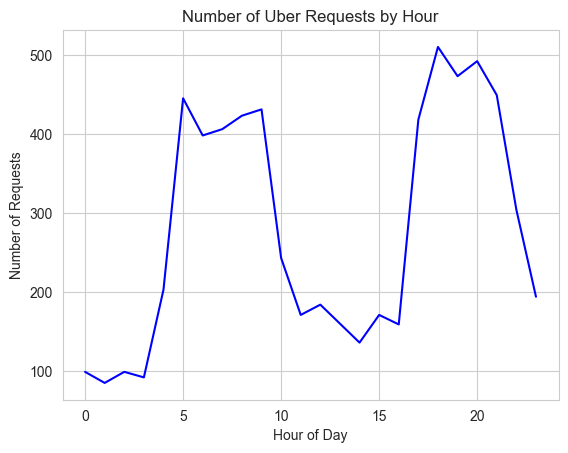

In [28]:
# count number of requests per hour
hourly_requests = uber['Request_hour'].value_counts().sort_index()

# simple line plot
plt.plot(hourly_requests.index, hourly_requests.values, 'b')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Requests')
plt.title('Number of Uber Requests by Hour')
plt.grid(True)
plt.show()

# interpretation:
# requests happen most often from 5:00 to 8:00 (Morning) then again from 16:00 to 21:00 (Evening)

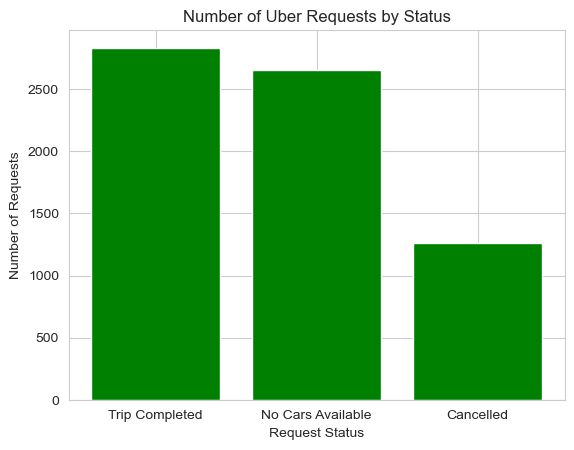

In [244]:
# count each status type ('Trip Completed', 'Cancelled', 'No Cars Available')
status_counts = uber['Status'].value_counts()

# bar chart
plt.bar(status_counts.index, status_counts.values, color='green')
plt.xlabel('Request Status')
plt.ylabel('Number of Requests')
plt.title('Number of Uber Requests by Status')
plt.show()

# interpretation:
# amount of completed trips are almost as equal as trips that did not have available cars and cancelled trips are the least amount.

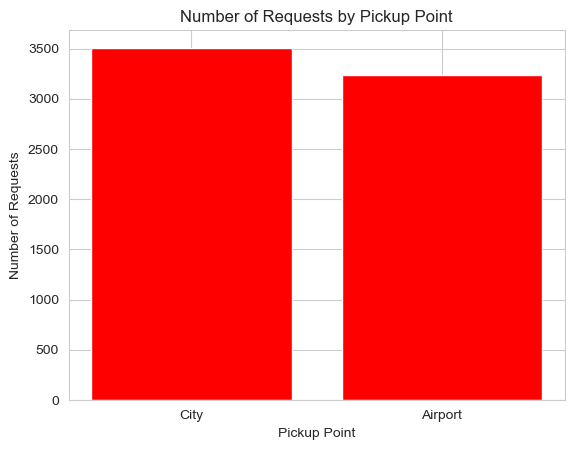

In [249]:
# count how often each pickup point appears
pickup_counts = uber['Pickup point'].value_counts()

# bar chart
plt.bar(pickup_counts.index, pickup_counts.values, color='red')
plt.xlabel('Pickup Point')
plt.ylabel('Number of Requests')
plt.title('Number of Requests by Pickup Point')
plt.show()

# interpretation:
# number of requests from City pickup point are more than that of Airport pickup point.

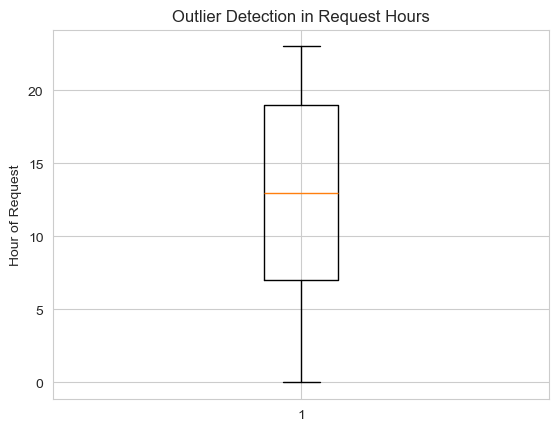

In [251]:
# basic outlier detection using hour
plt.boxplot(uber['Request_hour'].dropna())
plt.title('Outlier Detection in Request Hours')
plt.ylabel('Hour of Request')
plt.grid(True)
plt.show()

# interpretation:
# median = 13 , min = 0 , max = 23 and no outliers meaning the all the data is consistent

In [254]:
#boxplot shows the same information as .describe()
uber.describe()

,Request id,Request timestamp,Drop timestamp,Request_hour,Trip duration,Request_day,Request_day_encoded,Request_month,Drop_hour
count,6745.000000,6745,2831,6745.000000,6745.000000,6745.000000,6745.000000,6745.0,6745.000000
mean,3384.644922,2016-07-13 13:43:04.303039232,2016-07-13 13:15:33.899328768,12.956709,21.999024,13.010971,2.010971,7.0,5.405486
min,1.000000,2016-07-11 00:00:00,2016-07-11 00:51:00,0.000000,0.000000,11.000000,0.000000,7.0,0.000000
25%,1691.000000,2016-07-12 07:51:00,2016-07-12 07:42:00,7.000000,0.000000,12.000000,1.000000,7.0,0.000000
50%,3387.000000,2016-07-13 14:23:37,2016-07-13 12:14:06,13.000000,0.000000,13.000000,2.000000,7.0,0.000000
75%,5080.000000,2016-07-14 19:39:27,2016-07-14 19:13:52,19.000000,48.000000,14.000000,3.000000,7.0,10.000000
max,6766.000000,2016-07-15 23:59:58,2016-07-16 01:09:24,23.000000,83.000000,15.000000,4.000000,7.0,23.000000
std,1955.099667,NaN,NaN,6.504052,27.380592,1.422743,1.422743,0.0,7.616844


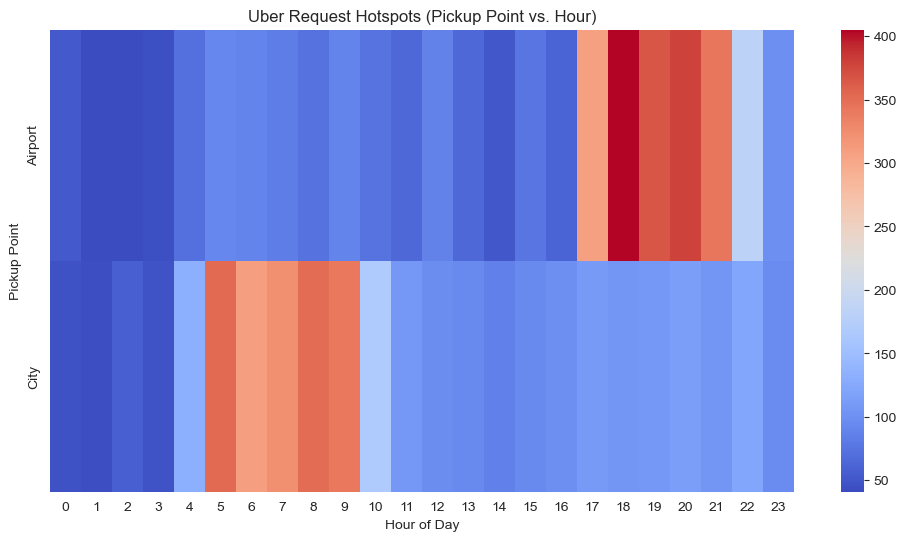

In [256]:
# create a pivot table for heatmap
heatmap_data = pd.pivot_table(uber, index='Pickup point', columns='Request_hour', aggfunc='size', fill_value=0)

# plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='coolwarm')
plt.title('Uber Request Hotspots (Pickup Point vs. Hour)')
plt.xlabel('Hour of Day')
plt.ylabel('Pickup Point')
plt.show()

# interpretation:
# Hour of Day = 18 and Airport pickup point have the most amount of requests (dark red indicates 400 requests)
# Hour of Day = 0-3 and Airport, City pickup points have the least amount of requests (dark blue indicates <100 requests)

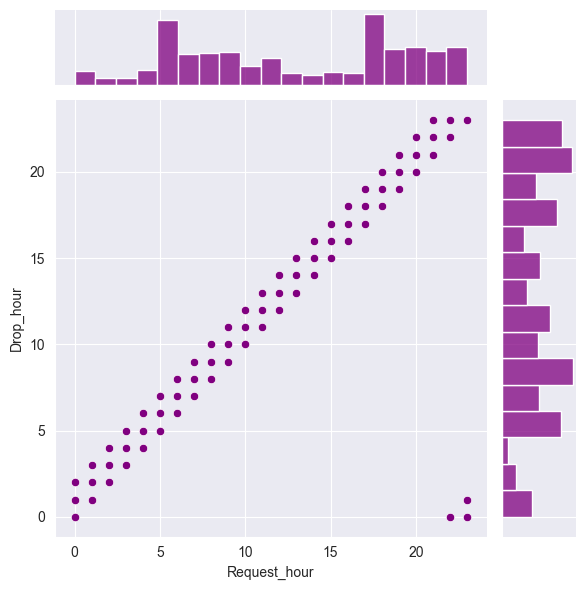

In [17]:
sns.set_style('darkgrid')

# Plot request hour vs. drop hour
sns.jointplot(
    x='Request_hour', 
    y='Drop_hour', 
    data=uber, 
    kind='scatter',  
    color='purple'
)

ValueError: Could not interpret value `Request_hour` for `x`. An entry with this name does not appear in `data`.

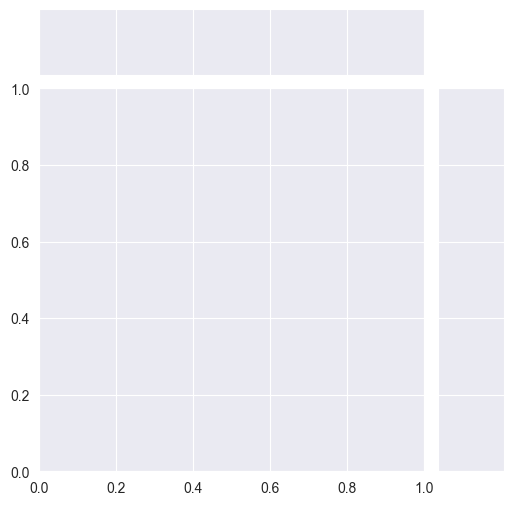

In [44]:
sns.set_style('darkgrid')

# Plot request hour vs. drop hour
sns.jointplot(
    x='Request_hour', 
    y='Drop_hour', 
    data=uber, 
    kind='hex',  
    color='purple'
)

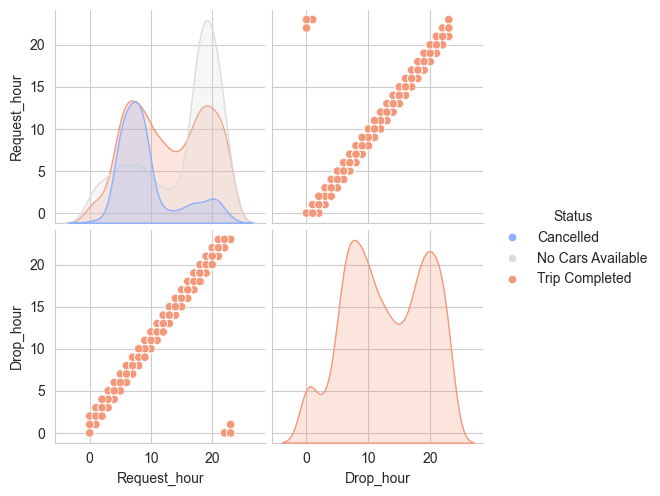

In [18]:
sns.set_style('whitegrid')

# Select the columns you want to include
cols_for_pairplot = ['Request_hour', 'Drop_hour', 'Request_day_of_week', 'Drop_day_of_week']
uber['Status'] = uber['Status'].astype('category')
# Pairplot with hue
sns.pairplot(uber[cols_for_pairplot + ['Status']], hue='Status', palette='coolwarm')

In [29]:
uber['Pickup_encoded'] = LabelEncoder().fit_transform(uber['Pickup point'])
uber

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Trip Completed,Request_hour,Trip duration,Request_day_of_week,Request_day,Request_day_encoded,Request_month,Drop_hour,Drop_day_of_week,Time_of_day,Pickup_encoded
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,True,11,69.00,Monday,11,0,7,13.0,Monday,Morning,0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,True,17,50.00,Monday,11,0,7,18.0,Monday,Evening,0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,True,9,41.00,Tuesday,12,1,7,9.0,Tuesday,Morning,1
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,True,21,55.00,Tuesday,12,1,7,22.0,Tuesday,Night,0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,True,8,52.52,Wednesday,13,2,7,9.0,Wednesday,Morning,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,No Driver,No Cars Available,2016-07-15 23:49:03,No time,False,23,0.00,Friday,15,4,7,0.0,No Day,Night,1
6741,6752,Airport,No Driver,No Cars Available,2016-07-15 23:50:05,No time,False,23,0.00,Friday,15,4,7,0.0,No Day,Night,0
6742,6751,City,No Driver,No Cars Available,2016-07-15 23:52:06,No time,False,23,0.00,Friday,15,4,7,0.0,No Day,Night,1
6743,6754,City,No Driver,No Cars Available,2016-07-15 23:54:39,No time,False,23,0.00,Friday,15,4,7,0.0,No Day,Night,1


In [30]:
## numpy array
x = uber[['Pickup_encoded', 'Request_hour', 'Request_day_encoded', 'Trip duration']].values
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

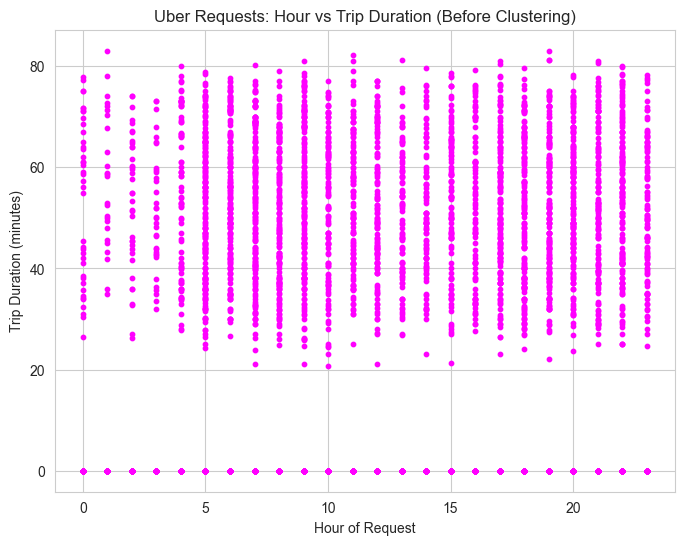

In [31]:
plt.figure(figsize=(8, 6))
plt.scatter(x[:, 1], x[:, 3], color='magenta', s=10)
plt.xlabel('Hour of Request')
plt.ylabel('Trip Duration (minutes)')
plt.title('Uber Requests: Hour vs Trip Duration (Before Clustering)')
plt.grid(True)
plt.show()

In [32]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=2)
y_pred = kmeans.fit_predict(x_scaled)

In [33]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)
centroids_pca = pca.transform(kmeans.cluster_centers_)

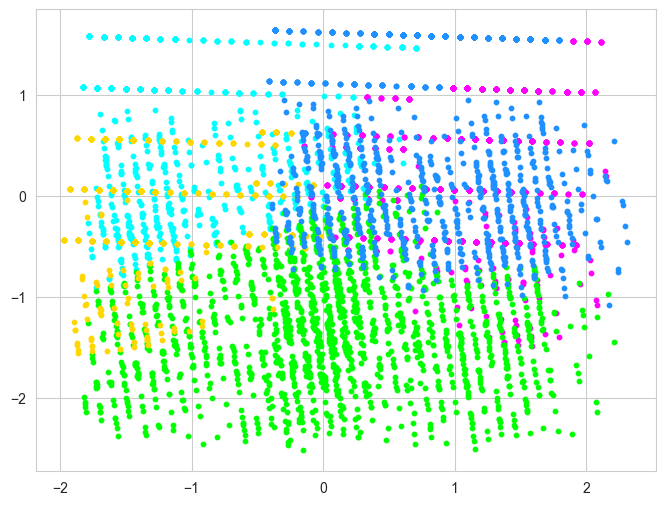

In [34]:
plt.figure(figsize=(8, 6))
colors = ['magenta', 'cyan', 'lime', 'gold', 'dodgerblue']
for i in range(n_clusters):
    plt.scatter(x_pca[y_pred == i, 0], x_pca[y_pred == i, 1], s=10, color=colors[i], label=f'Cluster {i+1}')

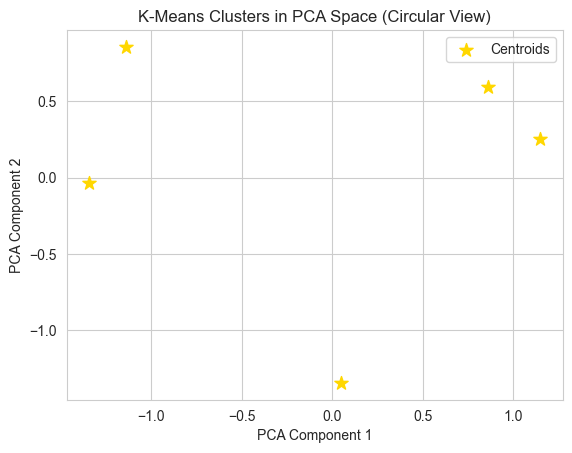

In [35]:
# Plot centroids
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='gold', marker='*', s=100, label='Centroids')
plt.title('K-Means Clusters in PCA Space (Circular View)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()

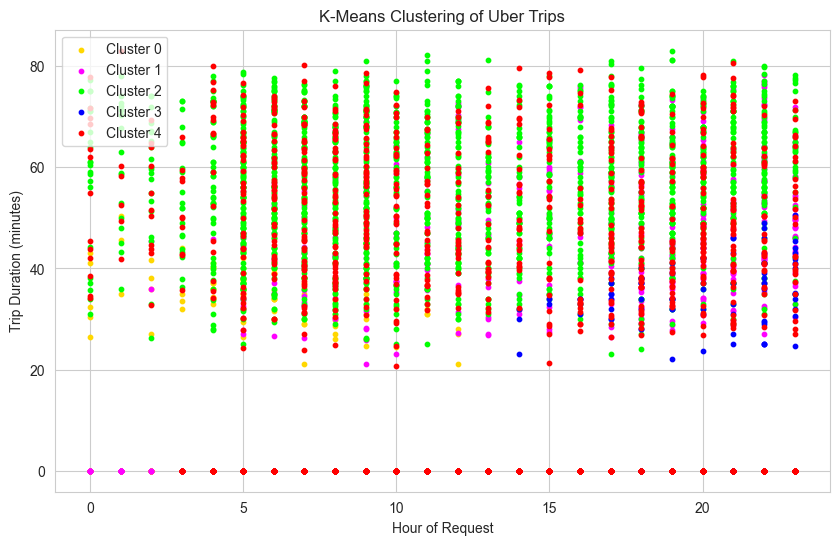

In [36]:
plt.figure(figsize=(10, 6))
colors = ['gold', 'magenta', 'lime', 'blue', 'red']
for i in range(n_clusters):
    cluster_points = uber[y_pred == i]
    plt.scatter(cluster_points['Request_hour'], cluster_points['Trip duration'],
                s=10, color=colors[i], label=f'Cluster {i}')

plt.title('K-Means Clustering of Uber Trips')
plt.xlabel('Hour of Request')
plt.ylabel('Trip Duration (minutes)')
plt.legend()
plt.grid(True)
plt.show()

## Report

In [280]:
# 1) Which driver had the most trips?
driver_trip_counts = uber[uber['Driver id'] != 'No Driver']['Driver id'].value_counts()
most_trips_driver = driver_trip_counts.idxmax()
most_trips_count = driver_trip_counts.max()

print("Driver ID with most trips: " + str(most_trips_driver) + " with " + str(most_trips_count) + " trips.")

Driver ID with most trips: 27.0 with 22 trips.


In [282]:
# 2) What time did the requests happen most often?
request_time = uber['Time_of_day'].value_counts()
most_common_time = request_time.idxmax()
most_common_time_count = request_time.max()

print("Most common request time: " + str(most_common_time) + " time with " + str(most_common_time_count) + " requests.")

Most common request time: Morning time with 2517 requests.


In [284]:
# 3) What place did the requests happen most often?
pickup_point = uber['Pickup point'].value_counts()
most_common_pickup = pickup_point.idxmax()
most_common_pickup_count = pickup_point.max()

print("Most common pickup point : " + str(most_common_pickup) + " with " + str(most_common_pickup_count) + " requests.")

Most common pickup point : City with 3507 requests.


In [286]:
# 4) What day did the requests happen most often?
request_day = uber['Request_day_of_week'].value_counts()
most_common_day = request_day.idxmax()
most_common_day_count = request_day.max()

print("Most common request day : " + str(most_common_day) + " with " + str(most_common_day_count) + " requests.")

Most common request day : Friday with 1381 requests.


In [288]:
# 5) What is the average trip duration?
avg_trip_duration = uber[uber['Trip Completed']]['Trip duration'].mean()
rounded_average = round(avg_trip_duration, 2)

print("Average trip duration : " + str(rounded_average) + " minutes.")

Average trip duration : 52.41 minutes.


In [290]:
# 6) Which day has the least amount of trips?
least_trips_day = request_day.idxmin()
least_trips_day_count = request_day.min()

print("Day with least trips : " + str(least_trips_day) + " with " + str(least_trips_day_count) + " requests.")

Day with least trips : Tuesday with 1307 requests.


In [292]:
# 7) What were the longest and shortest trip durations?
completed_trips = uber[uber['Trip Completed']]
longest_trip = completed_trips['Trip duration'].max()
shortest_trip = completed_trips['Trip duration'].min()

print("Longest trip duration : " + str(longest_trip) + " minutes.")
print("Shortest trip duration : " + str(shortest_trip) + " minutes.")

Longest trip duration : 83.0 minutes.
Shortest trip duration : 20.78 minutes.


In [294]:
# 9) How many trips were cancelled?
cancelled_trips = uber[uber['Status'] == 'Cancelled'].shape[0]
total_trips = uber.shape[0]
cancellation_rate = (cancelled_trips / total_trips) * 100
rounded_cancellation_rate = round(cancellation_rate, 2)

print("Number of cancelled trips : " + str(cancelled_trips) + " trips.")
print("Cancellation rate: " + str(rounded_cancellation_rate) + "%.")

Number of cancelled trips : 1264 trips.
Cancellation rate: 18.74%.


In [296]:
# 10) Which pickup point has the least number of drivers?
# filter out trips with no driver
driven_trips = uber[uber['Driver id'] != 'No Driver']

# group by pickup point and count unique drivers
drivers_per_pickup = driven_trips.groupby('Pickup point')['Driver id'].nunique()

# find the pickup point with least drivers
least_drivers_pickup = drivers_per_pickup.idxmin()
least_drivers_count = drivers_per_pickup.min()

print("The pickup point with the least number of drivers : " + str(least_drivers_pickup) + " with " + str(least_drivers_count) + " unique drivers.")
print("And number of unique drivers per pickup point : ")
print(drivers_per_pickup)

The pickup point with the least number of drivers : Airport with 300 unique drivers.
And number of unique drivers per pickup point : 
Pickup point
Airport    300
City       300
Name: Driver id, dtype: int64


In [298]:
# Count how many times each pickup point had no driver
no_driver_counts = uber[uber['Driver id'] == 'No Driver']['Pickup point'].value_counts()

# Find the pickup point with the most no-driver cases
worst_pickup = no_driver_counts.idxmax()
worst_count = no_driver_counts.max()

print(f"The pickup point with most 'No Driver' cases is '{worst_pickup}' with {worst_count} occurrences")

The pickup point with most 'No Driver' cases is 'Airport' with 1713 occurrences
